In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('modelling_dataset_for_candidates (1).csv')
df.head()

,userId,createdAt,age_at_signup,mobile_provider,mobile_plan,danaVerifiedAccount,gps_closest_center,gps_distance_to_center,verify.emergencyContact.passed,verify.applicant.passed,defaultPayment,detail.gender,detail.birthplace,detail.penghasilan_band,detail.pendidikan,detail.pekerjaan,detail.industri,npwp_provided,statistics.statisticCustomerInfo.1-7d,statistics.statisticCustomerInfo.1-14d,statistics.statisticCustomerInfo.1-21d,statistics.statisticCustomerInfo.1-30d,statistics.statisticCustomerInfo.1-60d,statistics.statisticCustomerInfo.1-90d,NO_QUERY_RECORD,blacklist,defaulted
0,5d93812188e3b00242523d34,2019-10-01 23:38:57.867000+07:00,24,Natrindo Telepon Seluler,Axis,True,Bandung,7.953427,True,True,dana,m,Bandung,> 20.000.001,s1,wiraswasta,industri15,True,6.0,10.0,13.0,14.0,15.0,18.0,False,False,NaN
1,5d9365ee88e3b00242523d25,2019-10-01 21:42:54.841000+07:00,48,Telkomsel,KartuHALO,True,Tangerang,182.590257,True,True,dana,f,Padang,5000001 - 10.000.000 IDR,s2,negeri,industri8,True,0.0,1.0,1.0,2.0,4.0,7.0,False,False,True
2,5d93074188e3b00242523c80,2019-10-01 14:58:57.970000+07:00,34,NaN,NaN,True,Bandung,166.503980,True,True,dana,m,Tulungagung,5000001 - 10.000.000 IDR,s1,swasta,industri18,True,0.0,0.0,3.0,4.0,7.0,13.0,False,True,NaN
3,5d92e4b7fd29a5709fd31a46,2019-10-01 12:31:35.707000+07:00,24,Axiata,XL Prabayar/Pascabayar,True,Tangerang,5.312900,True,True,dana,m,Tangerang,< 5.000.000 IDR,sma,swasta,industri24,True,2.0,2.0,2.0,3.0,11.0,13.0,False,True,True
4,5d92e178fd29a5709fd31a37,2019-10-01 12:17:44.848000+07:00,33,Axiata,XL Prabayar/Pascabayar,True,Tangerang,56.978688,False,True,dana,m,Serang,< 5.000.000 IDR,s1,swasta,industri24,True,0.0,0.0,0.0,0.0,4.0,5.0,False,True,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   userId                                  904 non-null    object 
 1   createdAt                               904 non-null    object 
 2   age_at_signup                           904 non-null    int64  
 3   mobile_provider                         781 non-null    object 
 4   mobile_plan                             781 non-null    object 
 5   danaVerifiedAccount                     904 non-null    bool   
 6   gps_closest_center                      892 non-null    object 
 7   gps_distance_to_center                  892 non-null    float64
 8   verify.emergencyContact.passed          904 non-null    bool   
 9   verify.applicant.passed                 904 non-null    bool   
 10  defaultPayment                          897 non-null    object

In [4]:
#fill nan values except `defaulted`

for x in df.loc[:, df.columns != 'defaulted'].columns:
    if(df[x].dtype == np.float64 or df[x].dtype == np.int64):
        df[x] = df[x].fillna(0)
    if(df[x].dtype == np.object):
        df[x] = df[x].fillna('other')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   userId                                  904 non-null    object 
 1   createdAt                               904 non-null    object 
 2   age_at_signup                           904 non-null    int64  
 3   mobile_provider                         904 non-null    object 
 4   mobile_plan                             904 non-null    object 
 5   danaVerifiedAccount                     904 non-null    bool   
 6   gps_closest_center                      904 non-null    object 
 7   gps_distance_to_center                  904 non-null    float64
 8   verify.emergencyContact.passed          904 non-null    bool   
 9   verify.applicant.passed                 904 non-null    bool   
 10  defaultPayment                          904 non-null    object

In [6]:
quintiles = df[['statistics.statisticCustomerInfo.1-7d', 'statistics.statisticCustomerInfo.1-14d', 'statistics.statisticCustomerInfo.1-21d', 'statistics.statisticCustomerInfo.1-30d', 'statistics.statisticCustomerInfo.1-60d', 'statistics.statisticCustomerInfo.1-90d']].quantile([.50, .75]).to_dict()

In [7]:
quintiles

{'statistics.statisticCustomerInfo.1-7d': {0.5: 0.0, 0.75: 0.0},
 'statistics.statisticCustomerInfo.1-14d': {0.5: 0.0, 0.75: 1.0},
 'statistics.statisticCustomerInfo.1-21d': {0.5: 0.0, 0.75: 1.0},
 'statistics.statisticCustomerInfo.1-30d': {0.5: 0.0, 0.75: 1.0},
 'statistics.statisticCustomerInfo.1-60d': {0.5: 0.0, 0.75: 2.0},
 'statistics.statisticCustomerInfo.1-90d': {0.5: 0.0, 0.75: 3.0}}

In [8]:
def q_score(x, c):
    if x <= quintiles[c][.50]:
        return 1
    elif x <= quintiles[c][.75]:
        return 2
    else:
        return 3

In [9]:
df['7dayScore'] = df['statistics.statisticCustomerInfo.1-7d'].apply(lambda x: q_score(x, 'statistics.statisticCustomerInfo.1-7d'))
df['14dayScore'] = df['statistics.statisticCustomerInfo.1-14d'].apply(lambda x: q_score(x, 'statistics.statisticCustomerInfo.1-14d'))
df['21dayScore'] = df['statistics.statisticCustomerInfo.1-21d'].apply(lambda x: q_score(x, 'statistics.statisticCustomerInfo.1-21d'))
df['30dayScore'] = df['statistics.statisticCustomerInfo.1-30d'].apply(lambda x: q_score(x, 'statistics.statisticCustomerInfo.1-30d'))
df['60dayScore'] = df['statistics.statisticCustomerInfo.1-60d'].apply(lambda x: q_score(x, 'statistics.statisticCustomerInfo.1-60d'))
df['90dayScore'] = df['statistics.statisticCustomerInfo.1-90d'].apply(lambda x: q_score(x, 'statistics.statisticCustomerInfo.1-90d'))

In [10]:
df.head()

,userId,createdAt,age_at_signup,mobile_provider,mobile_plan,danaVerifiedAccount,gps_closest_center,gps_distance_to_center,verify.emergencyContact.passed,verify.applicant.passed,defaultPayment,detail.gender,detail.birthplace,detail.penghasilan_band,detail.pendidikan,detail.pekerjaan,detail.industri,npwp_provided,statistics.statisticCustomerInfo.1-7d,statistics.statisticCustomerInfo.1-14d,statistics.statisticCustomerInfo.1-21d,statistics.statisticCustomerInfo.1-30d,statistics.statisticCustomerInfo.1-60d,statistics.statisticCustomerInfo.1-90d,NO_QUERY_RECORD,blacklist,defaulted,7dayScore,14dayScore,21dayScore,30dayScore,60dayScore,90dayScore
0,5d93812188e3b00242523d34,2019-10-01 23:38:57.867000+07:00,24,Natrindo Telepon Seluler,Axis,True,Bandung,7.953427,True,True,dana,m,Bandung,> 20.000.001,s1,wiraswasta,industri15,True,6.0,10.0,13.0,14.0,15.0,18.0,False,False,NaN,3,3,3,3,3,3
1,5d9365ee88e3b00242523d25,2019-10-01 21:42:54.841000+07:00,48,Telkomsel,KartuHALO,True,Tangerang,182.590257,True,True,dana,f,Padang,5000001 - 10.000.000 IDR,s2,negeri,industri8,True,0.0,1.0,1.0,2.0,4.0,7.0,False,False,True,1,2,2,3,3,3
2,5d93074188e3b00242523c80,2019-10-01 14:58:57.970000+07:00,34,other,other,True,Bandung,166.503980,True,True,dana,m,Tulungagung,5000001 - 10.000.000 IDR,s1,swasta,industri18,True,0.0,0.0,3.0,4.0,7.0,13.0,False,True,NaN,1,1,3,3,3,3
3,5d92e4b7fd29a5709fd31a46,2019-10-01 12:31:35.707000+07:00,24,Axiata,XL Prabayar/Pascabayar,True,Tangerang,5.312900,True,True,dana,m,Tangerang,< 5.000.000 IDR,sma,swasta,industri24,True,2.0,2.0,2.0,3.0,11.0,13.0,False,True,True,3,3,3,3,3,3
4,5d92e178fd29a5709fd31a37,2019-10-01 12:17:44.848000+07:00,33,Axiata,XL Prabayar/Pascabayar,True,Tangerang,56.978688,False,True,dana,m,Serang,< 5.000.000 IDR,s1,swasta,industri24,True,0.0,0.0,0.0,0.0,4.0,5.0,False,True,NaN,1,1,1,1,3,3


In [11]:
print("Mobile Provider", df['mobile_provider'].unique())
print("Mobile Plan", df['mobile_plan'].unique())
print("Default Payment", df['defaultPayment'].unique())
print("Income", df['detail.penghasilan_band'].unique())
print("Education", df['detail.pendidikan'].unique())
print("Profession", df['detail.pekerjaan'].unique())
print("Industry", df['detail.industri'].unique())

Mobile Provider ['Natrindo Telepon Seluler' 'Telkomsel' 'other' 'Axiata' 'Indosat' 'Three'
 'Smart Telecom']
Mobile Plan ['Axis' 'KartuHALO' 'other' 'XL Prabayar/Pascabayar' 'SimPATI, KartuHALO'
 'IM3' 'Kartu As' 'XL Prabayar' 'Mentari, Matrix' 'SimPATI' '3' 'Mentari'
 'Smart' 'Kartu As Fress']
Default Payment ['dana' 'card' 'other']
Income ['> 20.000.001' '5000001 - 10.000.000 IDR' '< 5.000.000 IDR'
 '15.000.001 - 20.000.000 IDR' '10.000.001 - 15.000.000 IDR']
Education ['s1' 's2' 'sma' 'd3' 's3' 'other' 'd1' 'sd']
Profession ['wiraswasta' 'negeri' 'swasta' 'product-management' 'bumn' 'art-creative'
 'sales' 'freelancer' 'finance' 'information-technology'
 'business-analyst' 'human-resources' 'administrative' 'other' 'operation'
 'marketing' 'legal' 'customer-service' 'project-management' 'POLRI'
 'data-analyst' 'public-relations' 'business-development' 'copy-writer'
 'researcher']
Industry ['industri15' 'industri8' 'industri18' 'industri24' 'industri14'
 'industri22' 'industri13' 'in

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


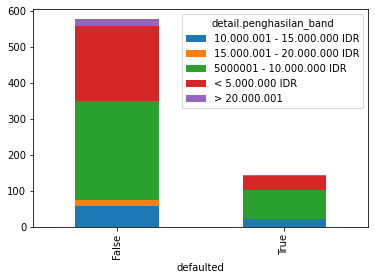

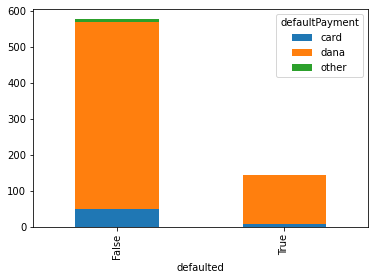

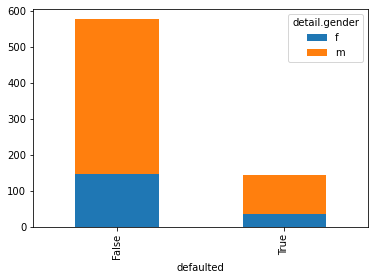

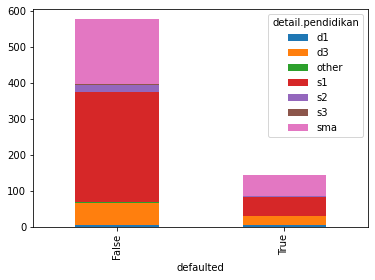

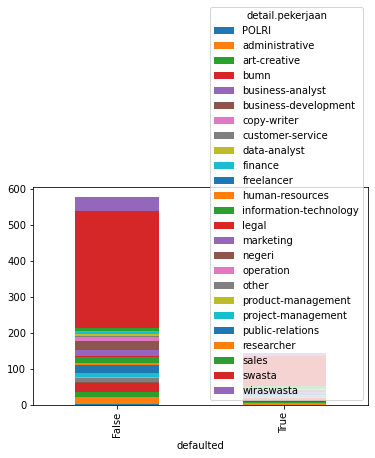

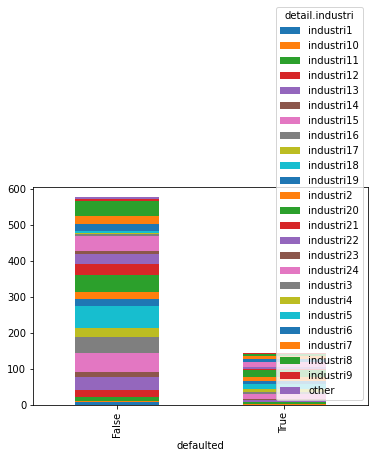

In [12]:
print(df.groupby(['detail.penghasilan_band', 'defaulted']).size().reset_index().pivot(columns='detail.penghasilan_band', index='defaulted', values=0).plot(kind='bar', stacked=True))
print(df.groupby(['defaultPayment', 'defaulted']).size().reset_index().pivot(columns='defaultPayment', index='defaulted', values=0).plot(kind='bar', stacked=True))
print(df.groupby(['detail.gender', 'defaulted']).size().reset_index().pivot(columns='detail.gender', index='defaulted', values=0).plot(kind='bar', stacked=True))
print(df.groupby(['detail.pendidikan', 'defaulted']).size().reset_index().pivot(columns='detail.pendidikan', index='defaulted', values=0).plot(kind='bar', stacked=True))
print(df.groupby(['detail.pekerjaan', 'defaulted']).size().reset_index().pivot(columns='detail.pekerjaan', index='defaulted', values=0).plot(kind='bar', stacked=True))
print(df.groupby(['detail.industri', 'defaulted']).size().reset_index().pivot(columns='detail.industri', index='defaulted', values=0).plot(kind='bar', stacked=True))

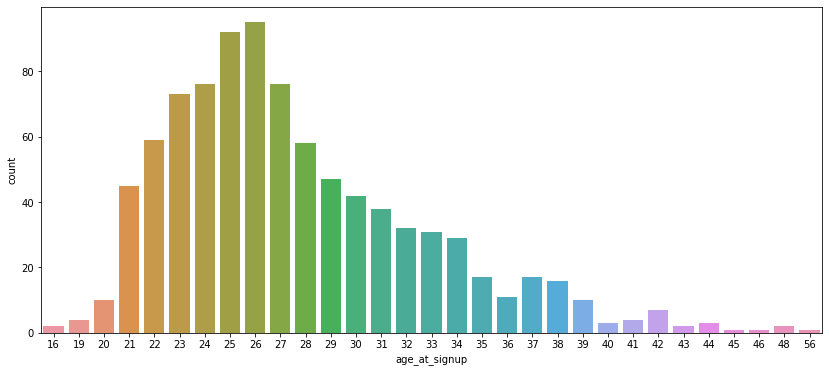

In [13]:
a4_dims = (14, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df['age_at_signup'],ax=ax)

In [14]:
def bool_preprocess(x):
    if x == True:
        return 1
    else:
        return 0

In [15]:
df['danaVerifiedAccount'] = df['danaVerifiedAccount'].apply(bool_preprocess)
df['verify.emergencyContact.passed'] = df['verify.emergencyContact.passed'].apply(bool_preprocess)
df['verify.applicant.passed'] = df['verify.applicant.passed'].apply(bool_preprocess)
df['npwp_provided'] = df['npwp_provided'].apply(bool_preprocess)
df['defaulted'] = df['defaulted'].apply(bool_preprocess)

In [16]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, recall_score, roc_auc_score, confusion_matrix, precision_score, accuracy_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score        
from numpy import average
from multiscorer.multiscorer import MultiScorer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

In [17]:
le_defaultPayment = preprocessing.LabelEncoder()
le_defaultPayment.fit(df['defaultPayment'])
df['defaultPayment'] = le_defaultPayment.transform(df['defaultPayment'])

le_detail_gender = preprocessing.LabelEncoder()
le_detail_gender.fit(df['detail.gender'])
df['detail.gender'] = le_detail_gender.transform(df['detail.gender'])

le_detail_penghasilan = preprocessing.LabelEncoder()
le_detail_penghasilan.fit(df['detail.penghasilan_band'])
df['detail.penghasilan_band'] = le_detail_penghasilan.transform(df['detail.penghasilan_band'])

le_detail_pendidikan = preprocessing.LabelEncoder()
le_detail_pendidikan.fit(df['detail.pendidikan'])
df['detail.pendidikan'] = le_detail_pendidikan.transform(df['detail.pendidikan'])

le_detail_pekerjaan = preprocessing.LabelEncoder()
le_detail_pekerjaan.fit(df['detail.pekerjaan'])
df['detail.pekerjaan'] = le_detail_pekerjaan.transform(df['detail.pekerjaan'])

le_detail_industri = preprocessing.LabelEncoder()
le_detail_industri.fit(df['detail.industri'])
df['detail.industri'] = le_detail_industri.transform(df['detail.industri'])

In [18]:
df.head()

,userId,createdAt,age_at_signup,mobile_provider,mobile_plan,danaVerifiedAccount,gps_closest_center,gps_distance_to_center,verify.emergencyContact.passed,verify.applicant.passed,defaultPayment,detail.gender,detail.birthplace,detail.penghasilan_band,detail.pendidikan,detail.pekerjaan,detail.industri,npwp_provided,statistics.statisticCustomerInfo.1-7d,statistics.statisticCustomerInfo.1-14d,statistics.statisticCustomerInfo.1-21d,statistics.statisticCustomerInfo.1-30d,statistics.statisticCustomerInfo.1-60d,statistics.statisticCustomerInfo.1-90d,NO_QUERY_RECORD,blacklist,defaulted,7dayScore,14dayScore,21dayScore,30dayScore,60dayScore,90dayScore
0,5d93812188e3b00242523d34,2019-10-01 23:38:57.867000+07:00,24,Natrindo Telepon Seluler,Axis,1,Bandung,7.953427,1,1,1,1,Bandung,4,3,24,6,1,6.0,10.0,13.0,14.0,15.0,18.0,False,False,0,3,3,3,3,3,3
1,5d9365ee88e3b00242523d25,2019-10-01 21:42:54.841000+07:00,48,Telkomsel,KartuHALO,1,Tangerang,182.590257,1,1,1,0,Padang,2,4,15,22,1,0.0,1.0,1.0,2.0,4.0,7.0,False,False,1,1,2,2,3,3,3
2,5d93074188e3b00242523c80,2019-10-01 14:58:57.970000+07:00,34,other,other,1,Bandung,166.503980,1,1,1,1,Tulungagung,2,3,23,9,1,0.0,0.0,3.0,4.0,7.0,13.0,False,True,0,1,1,3,3,3,3
3,5d92e4b7fd29a5709fd31a46,2019-10-01 12:31:35.707000+07:00,24,Axiata,XL Prabayar/Pascabayar,1,Tangerang,5.312900,1,1,1,1,Tangerang,3,7,23,16,1,2.0,2.0,2.0,3.0,11.0,13.0,False,True,1,3,3,3,3,3,3
4,5d92e178fd29a5709fd31a37,2019-10-01 12:17:44.848000+07:00,33,Axiata,XL Prabayar/Pascabayar,1,Tangerang,56.978688,0,1,1,1,Serang,3,3,23,16,1,0.0,0.0,0.0,0.0,4.0,5.0,False,True,0,1,1,1,1,3,3


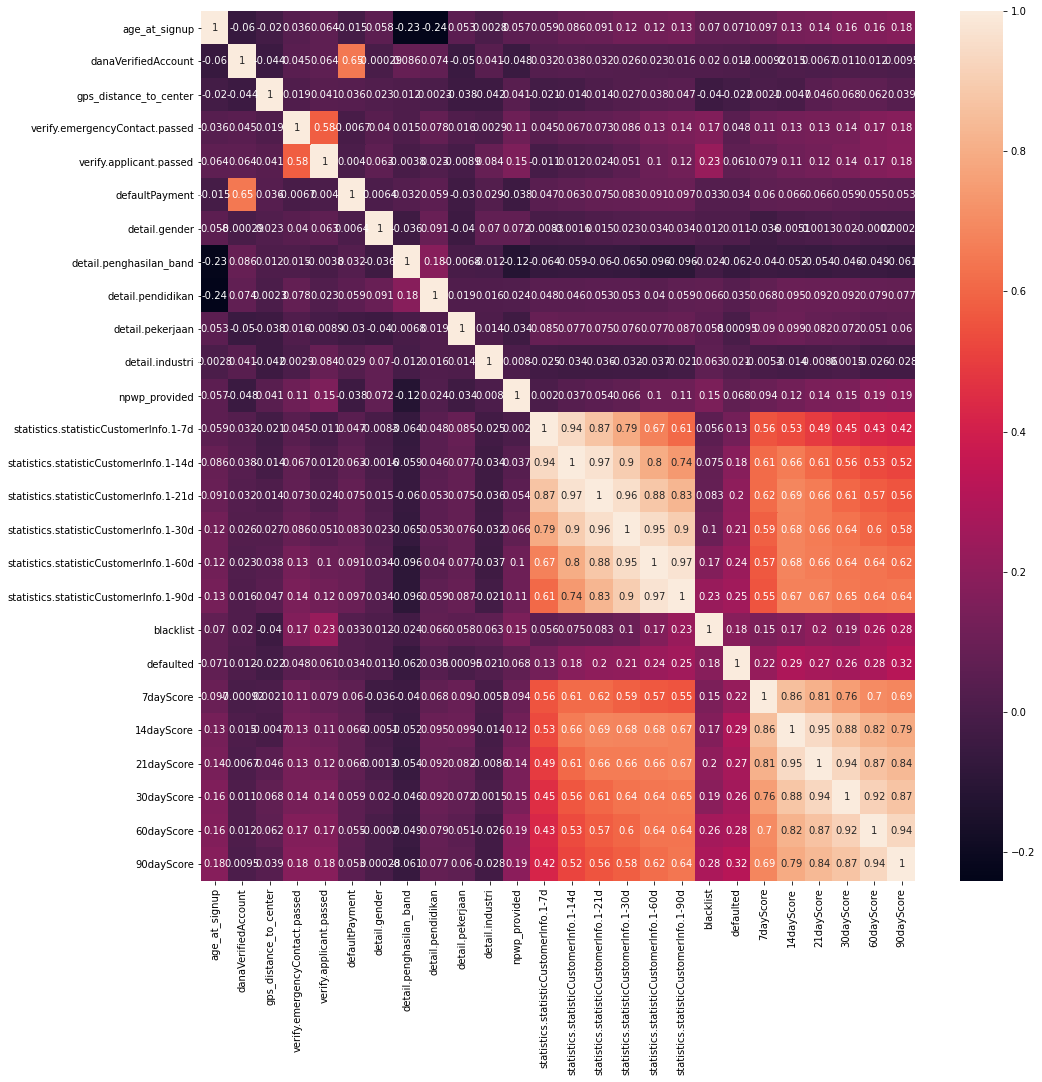

In [19]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot=True)

In [20]:
#'statistics.statisticCustomerInfo.1-7d', 'statistics.statisticCustomerInfo.1-14d', 'statistics.statisticCustomerInfo.1-21d', 'statistics.statisticCustomerInfo.1-30d', 'statistics.statisticCustomerInfo.1-60d', 'statistics.statisticCustomerInfo.1-90d', 
X = df[~df.defaulted.isna()][['7dayScore', '14dayScore', '21dayScore', '30dayScore', '60dayScore', '90dayScore', 'detail.pendidikan', 'detail.penghasilan_band', 'detail.pekerjaan', 'detail.gender']]
y = df[~df.defaulted.isna()]['defaulted']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.30)

In [22]:
rfc = RandomForestClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
svc = OneVsRestClassifier(LinearSVC(random_state=0))
lr = LogisticRegression(random_state=0)

In [23]:
models = [rfc, dt, lr]
names = ["Random Forest", "Decision Tree", "Logistic Regression"]

scorer = MultiScorer({
    'accuracy' : (accuracy_score, {}),
    'precision': (precision_score,{'average': 'macro'}),
    'recall'   : (recall_score, {'average': 'macro'}),
    'F-measure': (f1_score, {'average': 'macro'})
})

for model, name in zip(models, names):
    print(name)
    start = time.time()

    cross_val_score(model, X, y,scoring=scorer, cv=5)
    results = scorer.get_results()

    for metric_name in results.keys():
        average_score = np.average(results[metric_name])
        print('%s : %f' % (metric_name, average_score))

    print('time', time.time() - start, '\n\n')

Random Forest
accuracy : 0.816384
precision : 0.611775
recall : 0.566940
F-measure : 0.574955
time 0.6812424659729004 


Decision Tree
accuracy : 0.808091
precision : 0.599928
recall : 0.563401
F-measure : 0.570173
time 0.031914710998535156 


Logistic Regression
accuracy : 0.818230
precision : 0.601634
recall : 0.545590
F-measure : 0.540326
time 0.1545872688293457 




c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

In [24]:
models = [rfc, dt, lr]
names = ["Random Forest", "Decision Tree", "Logistic Regression"]

scorer = MultiScorer({
    'accuracy' : (accuracy_score, {}),
    'precision': (precision_score,{'average': 'macro'}),
    'recall'   : (recall_score, {'average': 'macro'}),
    'F-measure': (f1_score, {'average': 'macro'})
})

for model, name in zip(models, names):
    print(name)
    start = time.time()

    cross_val_score(model, X, y,scoring=scorer, cv=10)
    results = scorer.get_results()

    for metric_name in results.keys():
        average_score = np.average(results[metric_name])
        print('%s : %f' % (metric_name, average_score))

    print('time', time.time() - start, '\n\n')

Random Forest
accuracy : 0.816471
precision : 0.605775
recall : 0.550157
F-measure : 0.556518
time 1.5033650398254395 


Decision Tree
accuracy : 0.807045
precision : 0.591204
recall : 0.552591
F-measure : 0.556312
time 0.0638275146484375 


Logistic Regression


c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

accuracy : 0.816801
precision : 0.539821
recall : 0.535075
F-measure : 0.524514
time 0.2907297611236572 




c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

In [25]:
models = [rfc, dt, lr]
names = ["Random Forest", "Decision Tree", "Logistic Regression"]

scorer = MultiScorer({
    'accuracy' : (accuracy_score, {}),
    'precision': (precision_score,{'average': 'macro'}),
    'recall'   : (recall_score, {'average': 'macro'}),
    'F-measure': (f1_score, {'average': 'macro'})
})

for model, name in zip(models, names):
    print(name)
    start = time.time()

    cross_val_score(model, X, y,scoring=scorer, cv=15)
    results = scorer.get_results()

    for metric_name in results.keys():
        average_score = np.average(results[metric_name])
        print('%s : %f' % (metric_name, average_score))

    print('time', time.time() - start, '\n\n')

Random Forest
accuracy : 0.820929
precision : 0.618763
recall : 0.561468
F-measure : 0.568654
time 2.25026798248291 


Decision Tree
accuracy : 0.812596
precision : 0.611341
recall : 0.567993
F-measure : 0.574453
time 0.09469723701477051 


Logistic Regression


c:\users\gada-199\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

accuracy : 0.820140
precision : 0.556122
recall : 0.546026
F-measure : 0.538062
time 0.4686906337738037 




c:\users\gada-199\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
models = [rfc, dt, lr]
names = ["Random Forest", "Decision Tree", "Logistic Regression"]

scorer = MultiScorer({
    'accuracy' : (accuracy_score, {}),
    'precision': (precision_score,{'average': 'macro'}),
    'recall'   : (recall_score, {'average': 'macro'}),
    'F-measure': (f1_score, {'average': 'macro'})
})

for model, name in zip(models, names):
    print(name)
    start = time.time()

    cross_val_score(model, X, y,scoring=scorer, cv=20)
    results = scorer.get_results()

    for metric_name in results.keys():
        average_score = np.average(results[metric_name])
        print('%s : %f' % (metric_name, average_score))

    print('time', time.time() - start, '\n\n')

Random Forest
accuracy : 0.830966
precision : 0.657652
recall : 0.585080
F-measure : 0.594103
time 2.7756524085998535 


Decision Tree
accuracy : 0.817089
precision : 0.619503
recall : 0.574283
F-measure : 0.579516
time 0.1216745376586914 


Logistic Regression


c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

c:\users\gada-199\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\gada-199\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 i

accuracy : 0.823519
precision : 0.572826
recall : 0.551261
F-measure : 0.543540
time 0.6413030624389648 




c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
dt.fit(X_train_70, y_train_70)
rfc.fit(X_train_70, y_train_70)
lr.fit(X_train_70, y_train_70)

c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [28]:
predictDt = dt.predict(X_test_70)
predictProbDt = dt.predict_proba(X_test_70)

predictRfc = rfc.predict(X_test_70)
predictProbRfc = rfc.predict_proba(X_test_70)

predictLr = lr.predict(X_test_70)
predictProbLr = lr.predict_proba(X_test_70)

In [29]:
print(confusion_matrix(y_test_70,predictDt))
print(classification_report(y_test_70, predictDt))
print(f"Recall Decision Tree: {recall_score(y_test_70, predictDt, average='macro')}")
print(f"Precision Decision Tree: {precision_score(y_test_70, predictDt, average='macro')}")
print(f"f1 score Decision Tree: {f1_score(y_test_70, predictDt, average='macro')}")
      
print(confusion_matrix(y_test_70,predictRfc))
print(classification_report(y_test_70, predictRfc))
print(f"Recall Random Forest: {recall_score(y_test_70, predictRfc, average='macro')}")
print(f"Precision Random Forest: {precision_score(y_test_70, predictRfc, average='macro')}")
print(f"f1 score Random Forest: {f1_score(y_test_70, predictRfc, average='macro')}")
      
print(confusion_matrix(y_test_70,predictLr))
print(classification_report(y_test_70, predictLr))
print(f"Recall Logistic Regression: {recall_score(y_test_70, predictLr, average='macro')}")
print(f"Precision Logistic Regression: {precision_score(y_test_70, predictLr, average='macro')}")
print(f"f1 score Logistic Regression: {f1_score(y_test_70, predictLr, average='macro')}")

[[200  24]
 [ 38  10]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       224
           1       0.29      0.21      0.24        48

    accuracy                           0.77       272
   macro avg       0.57      0.55      0.55       272
weighted avg       0.74      0.77      0.76       272

Recall Decision Tree: 0.5505952380952381
Precision Decision Tree: 0.5672268907563025
f1 score Decision Tree: 0.554851652412628
[[205  19]
 [ 40   8]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       224
           1       0.30      0.17      0.21        48

    accuracy                           0.78       272
   macro avg       0.57      0.54      0.54       272
weighted avg       0.74      0.78      0.76       272

Recall Random Forest: 0.5409226190476191
Precision Random Forest: 0.5665154950869237
f1 score Random Forest: 0.5437668798862829
[[224   0]
 [ 46   2]]
              precisio

In [30]:
dt.fit(X_train, y_train)
rfc.fit(X_train, y_train)
lr.fit(X_train, y_train)

c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [31]:
predictDt = dt.predict(X_test)
predictProbDt = dt.predict_proba(X_test)

predictRfc = rfc.predict(X_test)
predictProbRfc = rfc.predict_proba(X_test)

predictLr = lr.predict(X_test)
predictProbLr = lr.predict_proba(X_test)

In [32]:
print(confusion_matrix(y_test,predictDt))
print(classification_report(y_test, predictDt))
print(f"Recall Decision Tree: {recall_score(y_test, predictDt, average='macro')}")
print(f"Precision Decision Tree: {precision_score(y_test, predictDt, average='macro')}")
print(f"f1 score Decision Tree: {f1_score(y_test, predictDt, average='macro')}")
      
print(confusion_matrix(y_test,predictRfc))
print(classification_report(y_test, predictRfc))
print(f"Recall Random Forest: {recall_score(y_test, predictRfc, average='macro')}")
print(f"Precision Random Forest: {precision_score(y_test, predictRfc, average='macro')}")
print(f"f1 score Random Forest: {f1_score(y_test, predictRfc, average='macro')}")
      
print(confusion_matrix(y_test,predictLr))
print(classification_report(y_test, predictLr))
print(f"Recall Logistic Regression: {recall_score(y_test, predictLr, average='macro')}")
print(f"Precision Logistic Regression: {precision_score(y_test, predictLr, average='macro')}")
print(f"f1 score Logistic Regression: {f1_score(y_test, predictLr, average='macro')}")

[[142   9]
 [ 26   4]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       151
           1       0.31      0.13      0.19        30

    accuracy                           0.81       181
   macro avg       0.58      0.54      0.54       181
weighted avg       0.76      0.81      0.77       181

Recall Decision Tree: 0.5368653421633555
Precision Decision Tree: 0.5764652014652014
f1 score Decision Tree: 0.5381643216446745
[[142   9]
 [ 23   7]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       151
           1       0.44      0.23      0.30        30

    accuracy                           0.82       181
   macro avg       0.65      0.59      0.60       181
weighted avg       0.79      0.82      0.80       181

Recall Random Forest: 0.5868653421633554
Precision Random Forest: 0.6490530303030303
f1 score Random Forest: 0.6015410016510732
[[145   6]
 [ 29   1]]
              precisi

In [33]:
from imblearn.over_sampling import SMOTE
ros = SMOTE()

X_ros, y_ros = ros.fit_sample(X_train, y_train)

dt.fit(X_ros, y_ros)
rfc.fit(X_ros, y_ros)
lr.fit(X_ros, y_ros)

predictDt = dt.predict(X_test)
predictProbDt = dt.predict_proba(X_test)

predictRfc = rfc.predict(X_test)
predictProbRfc = rfc.predict_proba(X_test)

predictLr = lr.predict(X_test)
predictProbLr = lr.predict_proba(X_test)

print(confusion_matrix(y_test,predictDt))
print(classification_report(y_test, predictDt))
print(f"Recall Decision Tree: {recall_score(y_test, predictDt, average='macro')}")
print(f"Precision Decision Tree: {precision_score(y_test, predictDt, average='macro')}")
print(f"f1 score Decision Tree: {f1_score(y_test, predictDt, average='macro')}")
      
print(confusion_matrix(y_test,predictRfc))
print(classification_report(y_test, predictRfc))
print(f"Recall Random Forest: {recall_score(y_test, predictRfc, average='macro')}")
print(f"Precision Random Forest: {precision_score(y_test, predictRfc, average='macro')}")
print(f"f1 score Random Forest: {f1_score(y_test, predictRfc, average='macro')}")
      
print(confusion_matrix(y_test,predictLr))
print(classification_report(y_test, predictLr))
print(f"Recall Logistic Regression: {recall_score(y_test, predictLr, average='macro')}")
print(f"Precision Logistic Regression: {precision_score(y_test, predictLr, average='macro')}")
print(f"f1 score Logistic Regression: {f1_score(y_test, predictLr, average='macro')}")

[[113  38]
 [ 16  14]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       151
           1       0.27      0.47      0.34        30

    accuracy                           0.70       181
   macro avg       0.57      0.61      0.57       181
weighted avg       0.78      0.70      0.73       181

Recall Decision Tree: 0.607505518763797
Precision Decision Tree: 0.5725998807394156
f1 score Decision Tree: 0.5743031358885018
[[107  44]
 [ 16  14]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       151
           1       0.24      0.47      0.32        30

    accuracy                           0.67       181
   macro avg       0.56      0.59      0.55       181
weighted avg       0.77      0.67      0.70       181

Recall Random Forest: 0.5876379690949227
Precision Random Forest: 0.5556490047659097
f1 score Random Forest: 0.5496018579960186
[[91 60]
 [10 20]]
              precision   

c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
X_ros_70, y_ros_70 = ros.fit_sample(X_train_70, y_train_70)

dt.fit(X_ros_70, y_ros_70)
rfc.fit(X_ros_70, y_ros_70)
lr.fit(X_ros_70, y_ros_70)

predictDt = dt.predict(X_test_70)
predictProbDt = dt.predict_proba(X_test_70)

predictRfc = rfc.predict(X_test_70)
predictProbRfc = rfc.predict_proba(X_test_70)

predictLr = lr.predict(X_test_70)
predictProbLr = lr.predict_proba(X_test_70)

print(confusion_matrix(y_test_70,predictDt))
print(classification_report(y_test_70, predictDt))
print(f"Recall Decision Tree: {recall_score(y_test_70, predictDt, average='macro')}")
print(f"Precision Decision Tree: {precision_score(y_test_70, predictDt, average='macro')}")
print(f"f1 score Decision Tree: {f1_score(y_test_70, predictDt, average='macro')}")
      
print(confusion_matrix(y_test_70,predictRfc))
print(classification_report(y_test_70, predictRfc))
print(f"Recall Random Forest: {recall_score(y_test_70, predictRfc, average='macro')}")
print(f"Precision Random Forest: {precision_score(y_test_70, predictRfc, average='macro')}")
print(f"f1 score Random Forest: {f1_score(y_test_70, predictRfc, average='macro')}")
      
print(confusion_matrix(y_test_70,predictLr))
print(classification_report(y_test_70, predictLr))
print(f"Recall Logistic Regression: {recall_score(y_test_70, predictLr, average='macro')}")
print(f"Precision Logistic Regression: {precision_score(y_test_70, predictLr, average='macro')}")
print(f"f1 score Logistic Regression: {f1_score(y_test_70, predictLr, average='macro')}")

[[163  61]
 [ 28  20]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       224
           1       0.25      0.42      0.31        48

    accuracy                           0.67       272
   macro avg       0.55      0.57      0.55       272
weighted avg       0.75      0.67      0.70       272

Recall Decision Tree: 0.5721726190476191
Precision Decision Tree: 0.550158360804085
f1 score Decision Tree: 0.5478098440272718
[[163  61]
 [ 27  21]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       224
           1       0.26      0.44      0.32        48

    accuracy                           0.68       272
   macro avg       0.56      0.58      0.56       272
weighted avg       0.75      0.68      0.71       272

Recall Random Forest: 0.5825892857142857
Precision Random Forest: 0.5569961489088575
f1 score Random Forest: 0.5552582683017465
[[157  67]
 [ 14  34]]
              precisio

c:\users\gada-199\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1. I'm using simple modelling techniques using scikit-learn package, with 3 models Random Forest, Decision Tree and Logistic Regression
2. From the experiment, model Random Forest worked best, because the recall score is better than the other when I'm tested with Random Sampling and Cross Validation. On this case I focused on Recall Score because High false positives mean that we may be incorrectly classifying people defaulting their credit card next month and lose out on customers by closing their accounts. High false negatives mean that we incorrectly classify accounts that will not default, and we may end up needing to use the fund in the reserve to cover our losses. As mentioned, credit card default could be considered as a fraud, hence it's important that we correctly classify all default cases to minimize risks and losses(Results on Excel Document - Experiment-Result.xslx).
3. First step I'm using Cross Validation with 4 K-Fold(5, 10, 15, 20) and then the second step with Random Sampling(80:20 and 70:30).
4. the features I created was to categorize statistics users from day 7 to 90 with quintiles(50% and 75%) method. I'm Categorize to 3 categories, value 1 above 50%, value 2 51% - 75% and value 3 > 75%, and when I try with another features, the features I created, work quite well but not the best